In [1]:
import sys

sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, eV, epsilon_0, e, physical_constants
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh, eig
import src.fem_1d_eigen
import importlib
from src.fem_1d_eigen import *

importlib.reload(src.fem_1d_eigen)

<module 'src.fem_1d_eigen' from '/home/yamamoto/physics/fem/fem_schrodinger/examples/../src/fem_1d_eigen.py'>

In [3]:
R = physical_constants["Bohr radius"][0]

In [4]:
# xs = np.linspace(1e-20, 1e-9, 1000)
# v = -1 / xs
xs = np.array([0, 1, 2, 3, 4])
# v = np.ones_like(xs)
v = xs

In [5]:
femeig = Fem1dEigen(xs, v)
K = femeig.get_K()
M = femeig.get_M()
V = femeig.get_V()
K_dirichlet = K[1:-1, 1:-1]
M_dirichlet = M[1:-1, 1:-1]
V_dirichlet = V[1:-1, 1:-1]
k = 3
val, vec = eigsh(
    K_dirichlet + V_dirichlet,
    k=k,
    M=M_dirichlet,
    which="LA",
    sigma=0,
)

# val, vec = eig(
#    K_dirichlet + V_dirichlet,
#    M_dirichlet,
# )

/tmp/ipykernel_152333/2418824513.py:9: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  val, vec = eigsh(


In [6]:
K

array([[-1.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -1.]])

In [7]:
M

array([[0.33333333, 0.16666667, 0.        , 0.        , 0.        ],
       [0.16666667, 0.66666667, 0.16666667, 0.        , 0.        ],
       [0.        , 0.16666667, 0.66666667, 0.16666667, 0.        ],
       [0.        , 0.        , 0.16666667, 0.66666667, 0.16666667],
       [0.        , 0.        , 0.        , 0.16666667, 0.33333333]])

In [8]:
V * 12

array([[ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  8.,  3.,  0.,  0.],
       [ 0.,  3., 16.,  5.,  0.],
       [ 0.,  0.,  5., 24.,  7.],
       [ 0.,  0.,  0.,  7., 15.]])

In [9]:
K_dirichlet

array([[-2.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -2.]])

In [10]:
val

array([-6.02797186, -1.10002182,  1.55656512])

In [11]:
K

array([[-1.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -1.]])

In [12]:
V

array([[0.08333333, 0.08333333, 0.        , 0.        , 0.        ],
       [0.08333333, 0.66666667, 0.25      , 0.        , 0.        ],
       [0.        , 0.25      , 1.33333333, 0.41666667, 0.        ],
       [0.        , 0.        , 0.41666667, 2.        , 0.58333333],
       [0.        , 0.        , 0.        , 0.58333333, 1.25      ]])

In [25]:
xs = np.linspace(1e-20, 1e-9, 1000)
v = -1 / xs * 0
femeig = Fem1dEigen(xs, v)
K = femeig.get_K()
M = femeig.get_M()
V = femeig.get_V()
K_dirichlet = K[1:-1, 1:-1]
M_dirichlet = M[1:-1, 1:-1]
V_dirichlet = V[1:-1, 1:-1]
k = 3
C0 = hbar**2 / (m_e)
C1 = e**2 / (4 * np.pi * epsilon_0)
val, vec = eigsh(
    -1 / 2 * C0 * K_dirichlet + C1 * V_dirichlet,
    k=k,
    M=M_dirichlet,
    which="LA",
    sigma=-20 * eV,
)

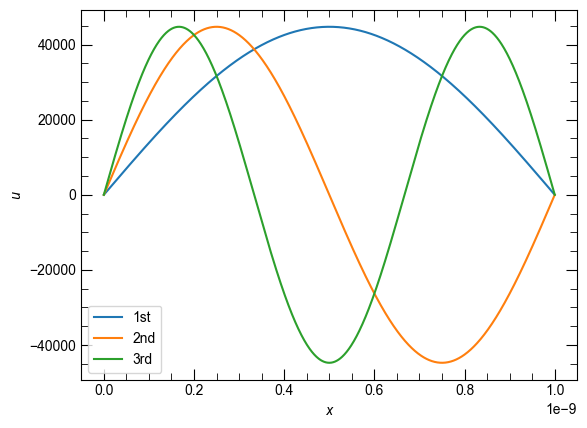

In [26]:
vec_0 = np.insert(vec, 0, 0, axis=0)
vec_0_m1 = np.insert(vec_0, vec_0.shape[0], 0, axis=0)
fig, ax = plt.subplots()
ax.plot(xs, vec_0_m1[:, 0], label="1st")
ax.plot(xs, vec_0_m1[:, 1], label="2nd")
ax.plot(xs, vec_0_m1[:, 2], label="3rd")
ax.legend()
ax.set_xlabel("$x$")
ax.set_ylabel("$u$")
fig.savefig("eigenfunction.pdf")

In [15]:
val / eV

array([-12.75493275,  -3.29109735,  -1.23486794])

In [16]:
val

array([-2.04356552e-18, -5.27291927e-19, -1.97847655e-19])

In [17]:
vals = []
part1 = np.arange(10, 100, 10)
part2 = np.arange(100, 1000, 100)
combined = np.concatenate((part1, part2))
for i in combined:
    print(i)
    xs = np.linspace(1e-15, 1e-9, i)
    v = -1 / xs
    femeig = Fem1dEigen(xs, v)
    K = femeig.get_K()
    M = femeig.get_M()
    V = femeig.get_V()
    K_dirichlet = K[1:-1, 1:-1]
    M_dirichlet = M[1:-1, 1:-1]
    V_dirichlet = V[1:-1, 1:-1]
    val, vec = eigsh(
        -1 / 2 * C0 * K_dirichlet + C1 * V_dirichlet,
        k=1,
        M=M_dirichlet,
        which="LM",
        sigma=-20 * eV,
    )
    vals.append(val)

10
20
30
40
50
60
70
80
90
100
200
300
400
500
600
700
800
900


In [18]:
np.array(vals) / eV

array([[ -3.33477227],
       [ -4.98087454],
       [ -6.03811717],
       [ -6.8071917 ],
       [ -7.4036172 ],
       [ -7.88515945],
       [ -8.28501685],
       [ -8.62404484],
       [ -8.91619114],
       [ -9.17122984],
       [-10.65967357],
       [-11.34693533],
       [-11.74333516],
       [-11.99680746],
       [-12.16740798],
       [-12.2840517 ],
       [-12.36194378],
       [-12.40916276]])

In [19]:
Ry = physical_constants["Rydberg constant times hc in eV"][0]
Ry

13.605693122994

In [20]:
val

array([-1.98816706e-18])

[1.]


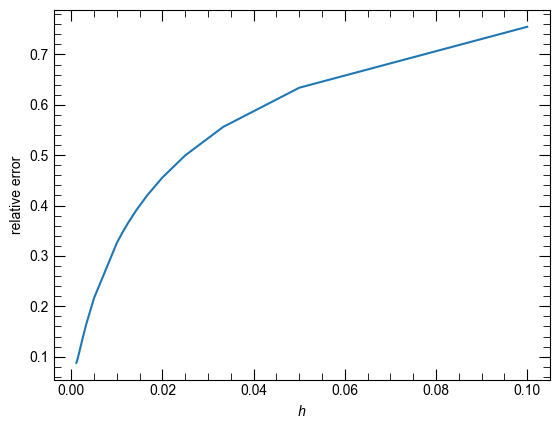

In [21]:
fig, ax = plt.subplots()
ax.plot(1 / combined, np.abs(-Ry - np.array(vals) / eV) / (Ry))
ax.set_xlabel("$h$")
ax.set_ylabel("relative error")
print((np.pi**2 - vals[-1]) / (np.pi**2))
fig.savefig("convergence.pdf")

In [22]:
eV

1.602176634e-19

In [23]:
-2.1256e-18 / eV

-13.266951688673798